In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, classification_report

In [2]:
# Load the dataset
df = pd.read_excel("card_transdata.xlsx")

## Explore the data

In [3]:
print("Dataset Shape:", df.shape)
df.head(10)

Dataset Shape: (1000000, 8)


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0
5,5.586408,13.261073,0.064768,1,0,0,0,0
6,3.724019,0.956838,0.278465,1,0,0,1,0
7,4.848247,0.320735,1.273050,1,0,1,0,0
8,0.876632,2.503609,1.516999,0,0,0,0,0
9,8.839047,2.970512,2.361683,1,0,0,1,0


In [4]:
df.tail(10)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999990,20.334489,11.437333,0.699527,1,1,0,1,0
999991,26.807213,0.102574,2.746114,1,0,0,1,0
999992,9.844674,0.250108,0.814046,1,0,0,1,0
999993,4.846253,2.844450,0.867740,1,0,0,1,0
999994,3.295884,0.085712,0.831991,1,0,0,1,0
999995,2.207101,0.112651,1.626798,1,1,0,0,0
999996,19.872726,2.683904,2.778303,1,1,0,0,0
999997,2.914857,1.472687,0.218075,1,1,0,1,0
999998,4.258729,0.242023,0.475822,1,0,0,1,0
999999,58.108125,0.318110,0.386920,1,1,0,1,0


In [5]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  int64  
 4   used_chip                       1000000 non-null  int64  
 5   used_pin_number                 1000000 non-null  int64  
 6   online_order                    1000000 non-null  int64  
 7   fraud                           1000000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 61.0 MB


## Preprocess the data

In [7]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [8]:
df.duplicated().any()

False

## Explore the target item

In [9]:
print("Fraud Distribution:")
print(df['fraud'].value_counts())

Fraud Distribution:
0    912597
1     87403
Name: fraud, dtype: int64


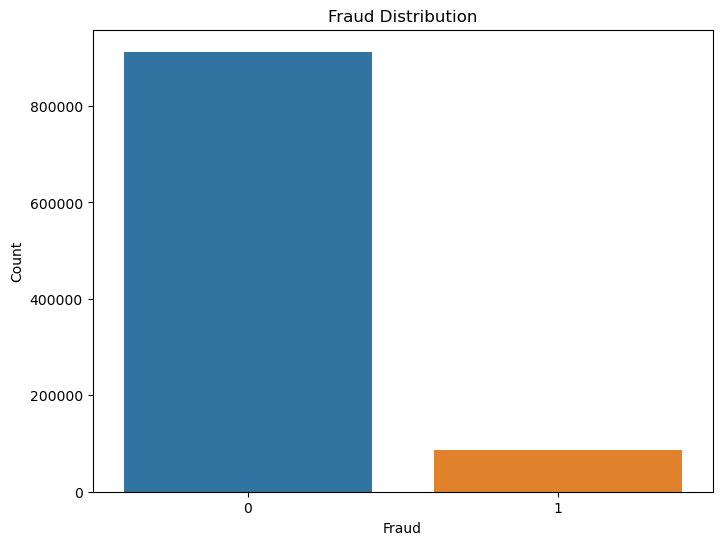

In [10]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='fraud', data=df)
plt.title('Fraud Distribution')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.show()

## Preparing the data for the Model

In [11]:
# Split the data into training and testing sets
X = df.drop('fraud', axis=1)
y = df['fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Take a random sample of the training data for hyperparameter tuning
sample_size = 800000
random_indices = np.random.choice(X_train.shape[0], size=sample_size, replace=False)
X_train_sample = X_train.iloc[random_indices]
y_train_sample = y_train.iloc[random_indices]

In [12]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sample)
X_test_scaled = scaler.transform(X_test)

## Training the models

#### Logistic Regression

In [13]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)
logistic_predictions = logistic_model.predict(X_test_scaled)

#### Decision Trees

In [14]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_scaled, y_train)
decision_tree_predictions = decision_tree_model.predict(X_test_scaled)

#### Random Forests

In [15]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_scaled, y_train)
random_forest_predictions = random_forest_model.predict(X_test_scaled)

#### Gradient Boosting

In [16]:
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train_scaled, y_train)
gradient_boosting_predictions = gradient_boosting_model.predict(X_test_scaled)

#### Neural Networks

In [17]:
neural_network_model = MLPClassifier()
neural_network_model.fit(X_train_scaled, y_train)
neural_network_predictions = neural_network_model.predict(X_test_scaled)

## Evaluate model performance

In [18]:
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc_roc = roc_auc_score(y_true, y_pred)
    return accuracy, precision, recall, f1, auc_roc

In [19]:
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)
logistic_predictions = logistic_model.predict(X_test_scaled)

logistic_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_precision = precision_score(y_test, logistic_predictions, zero_division=1)
logistic_recall = recall_score(y_test, logistic_predictions)
logistic_f1 = f1_score(y_test, logistic_predictions)
logistic_auc_roc = roc_auc_score(y_test, logistic_predictions)

print("Logistic Regression")
print("Accuracy:", logistic_accuracy)
print("Precision:", logistic_precision)
print("Recall:", logistic_recall)
print("F1-score:", logistic_f1)
print("AUC-ROC:", logistic_auc_roc)
print("\n--------------------------------------------------\n")

# Decision Trees
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_scaled, y_train)
decision_tree_predictions = decision_tree_model.predict(X_test_scaled)

decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
decision_tree_precision = precision_score(y_test, decision_tree_predictions, zero_division=1)
decision_tree_recall = recall_score(y_test, decision_tree_predictions)
decision_tree_f1 = f1_score(y_test, decision_tree_predictions)
decision_tree_auc_roc = roc_auc_score(y_test, decision_tree_predictions)

print("Decision Trees")
print("Accuracy:", decision_tree_accuracy)
print("Precision:", decision_tree_precision)
print("Recall:", decision_tree_recall)
print("F1-score:", decision_tree_f1)
print("AUC-ROC:", decision_tree_auc_roc)
print("\n--------------------------------------------------\n")

# Random Forests
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_scaled, y_train)
random_forest_predictions = random_forest_model.predict(X_test_scaled)

random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
random_forest_precision = precision_score(y_test, random_forest_predictions, zero_division=1)
random_forest_recall = recall_score(y_test, random_forest_predictions)
random_forest_f1 = f1_score(y_test, random_forest_predictions)
random_forest_auc_roc = roc_auc_score(y_test, random_forest_predictions)

print("Random Forests")
print("Accuracy:", random_forest_accuracy)
print("Precision:", random_forest_precision)
print("Recall:", random_forest_recall)
print("F1-score:", random_forest_f1)
print("AUC-ROC:", random_forest_auc_roc)
print("\n--------------------------------------------------\n")

# Gradient Boosting
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train_scaled, y_train)
gradient_boosting_predictions = gradient_boosting_model.predict(X_test_scaled)

gradient_boosting_accuracy = accuracy_score(y_test, gradient_boosting_predictions)
gradient_boosting_precision = precision_score(y_test, gradient_boosting_predictions, zero_division=1)
gradient_boosting_recall = recall_score(y_test, gradient_boosting_predictions)
gradient_boosting_f1 = f1_score(y_test, gradient_boosting_predictions)
gradient_boosting_auc_roc = roc_auc_score(y_test, gradient_boosting_predictions)

print("Gradient Boosting")
print("Accuracy:", gradient_boosting_accuracy)
print("Precision:", gradient_boosting_precision)
print("Recall:", gradient_boosting_recall)
print("F1-score:", gradient_boosting_f1)
print("AUC-ROC:", gradient_boosting_auc_roc)
print("\n--------------------------------------------------\n")

# Neural Networks
neural_network_model = MLPClassifier()
neural_network_model.fit(X_train_scaled, y_train)
neural_network_predictions = neural_network_model.predict(X_test_scaled)

neural_network_accuracy = accuracy_score(y_test, neural_network_predictions)
neural_network_precision = precision_score(y_test, neural_network_predictions, zero_division=1)
neural_network_recall = recall_score(y_test, neural_network_predictions)
neural_network_f1 = f1_score(y_test, neural_network_predictions)
neural_network_auc_roc = roc_auc_score(y_test, neural_network_predictions)

print("Neural Networks")
print("Accuracy:", neural_network_accuracy)
print("Precision:", neural_network_precision)
print("Recall:", neural_network_recall)
print("F1-score:", neural_network_f1)
print("AUC-ROC:", neural_network_auc_roc)
print("\n--------------------------------------------------\n")



Logistic Regression
Accuracy: 0.912785
Precision: 1.0
Recall: 0.0
F1-score: 0.0
AUC-ROC: 0.5

--------------------------------------------------

Decision Trees
Accuracy: 0.83238
Precision: 0.08556259986598629
Recall: 0.09516711574843777
F1-score: 0.09010965150363695
AUC-ROC: 0.4989932545716887

--------------------------------------------------

Random Forests
Accuracy: 0.91256
Precision: 0.09090909090909091
Recall: 0.0002866479390013186
F1-score: 0.0005714938850154304
AUC-ROC: 0.5000063804395347

--------------------------------------------------

Gradient Boosting
Accuracy: 0.912775
Precision: 0.0
Recall: 0.0
F1-score: 0.0
AUC-ROC: 0.49999452225880137

--------------------------------------------------

Neural Networks
Accuracy: 0.912785
Precision: 1.0
Recall: 0.0
F1-score: 0.0
AUC-ROC: 0.5

--------------------------------------------------



### Hyperparameter Tuning & Computing Feature Importance & Visualizations

In [20]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

#### Logistic Regression

In [21]:
# Hyperparameter tuning for Logistic Regression
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10]}
random_search_lr = RandomizedSearchCV(LogisticRegression(), param_grid_lr, cv=5, n_iter=3)
random_search_lr.fit(X_train_scaled, y_train)
best_logistic_regression_model = random_search_lr.best_estimator_

# Evaluate the best model on the test set
best_logistic_regression_predictions = best_logistic_regression_model.predict(X_test_scaled)
best_logistic_regression_report = classification_report(y_test, best_logistic_regression_predictions, zero_division=1)

print("Best Logistic Regression Performance:")
print(best_logistic_regression_report)

Best Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95    182557
           1       1.00      0.00      0.00     17443

    accuracy                           0.91    200000
   macro avg       0.96      0.50      0.48    200000
weighted avg       0.92      0.91      0.87    200000



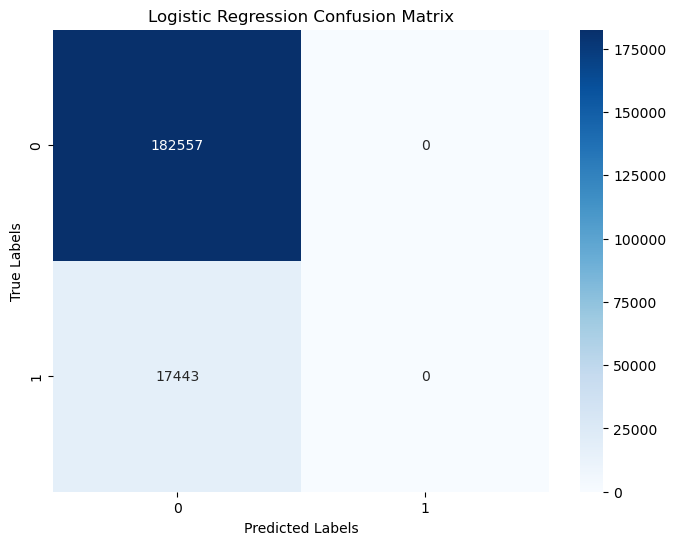

In [22]:
# Plot confusion Matrix for Best Logistic Regression Model
confusion_matrix_lr = confusion_matrix(y_test, best_logistic_regression_predictions)
plot_confusion_matrix(confusion_matrix_lr, "Logistic Regression Confusion Matrix")

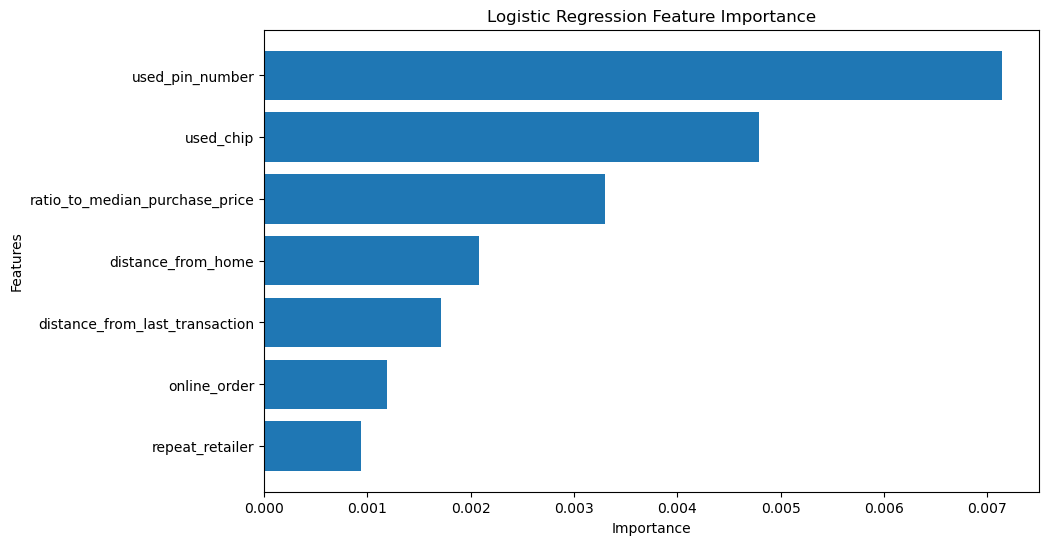

In [23]:
feature_importance = np.abs(best_logistic_regression_model.coef_[0])
feature_names = X.columns

sorted_idx = np.argsort(feature_importance)
sorted_features = feature_names[sorted_idx]
sorted_importance = feature_importance[sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_importance)), sorted_importance, align='center')
plt.yticks(range(len(sorted_importance)), sorted_features)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Logistic Regression Feature Importance')
plt.show()

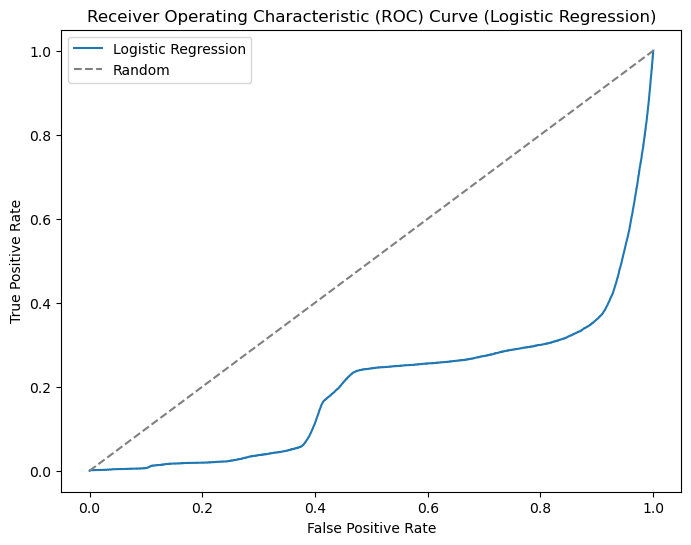

In [24]:
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test, best_logistic_regression_model.predict_proba(X_test_scaled)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_logistic, tpr_logistic, label='Logistic Regression')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Logistic Regression)')
plt.legend()
plt.show()

#### Decision Trees

In [25]:
# Hyperparameter tuning for Decision Trees
param_grid_dt = {'max_depth': [5, 10, None]}
random_search_dt = RandomizedSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, n_iter=3)
random_search_dt.fit(X_train_scaled, y_train_sample)
best_decision_tree_model = random_search_dt.best_estimator_

# Evaluate the best model on the test set
best_decision_tree_predictions = best_decision_tree_model.predict(X_test_scaled)
best_decision_tree_report = classification_report(y_test, best_decision_tree_predictions)

print("Best Decision Trees Performance:")
print(best_decision_tree_report)

Best Decision Trees Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    182557
           1       1.00      1.00      1.00     17443

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



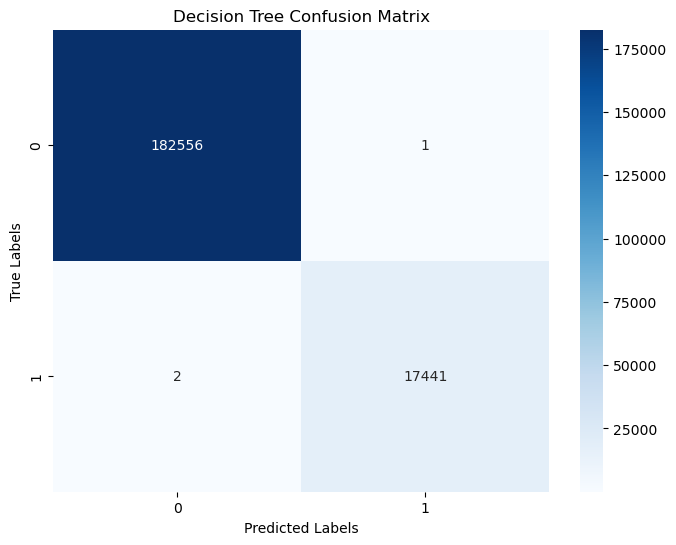

In [26]:
# Plot confusion Matrix for Best Decision Tree Model
confusion_matrix_decision_tree = confusion_matrix(y_test, best_decision_tree_predictions)
plot_confusion_matrix(confusion_matrix_decision_tree, "Decision Tree Confusion Matrix")

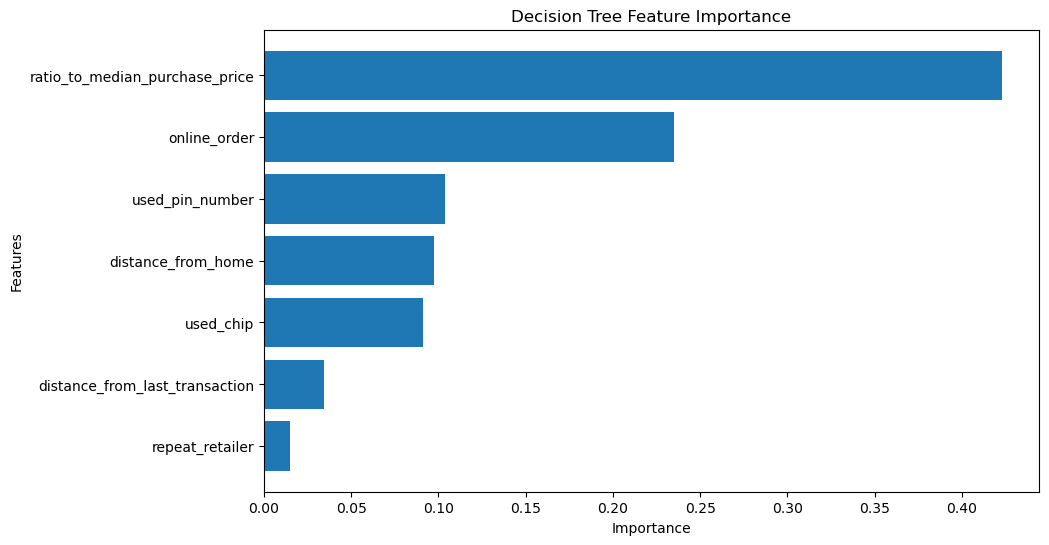

In [27]:
feature_importances_dt = best_decision_tree_model.feature_importances_
sorted_indices_dt = np.argsort(feature_importances_dt)

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances_dt)), feature_importances_dt[sorted_indices_dt])
plt.yticks(range(len(feature_importances_dt)), X.columns[sorted_indices_dt])
plt.title('Decision Tree Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

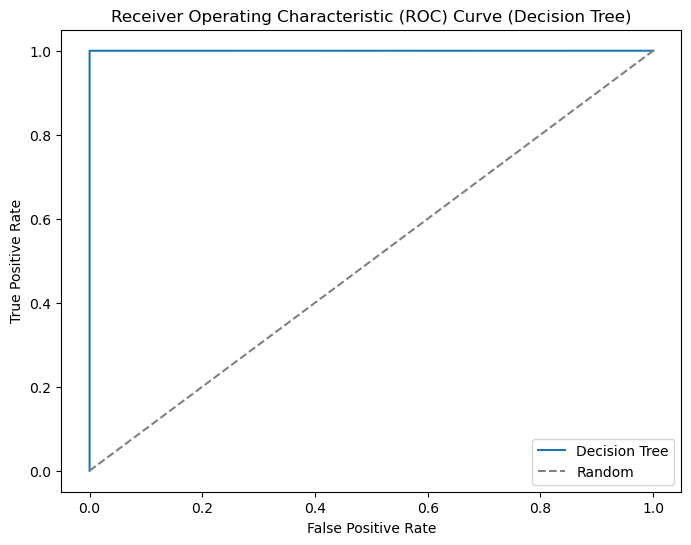

In [28]:
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, best_decision_tree_model.predict_proba(X_test_scaled)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Decision Tree)')
plt.legend()
plt.show()

#### Random Forests

In [29]:
# Hyperparameter tuning for Random Forests
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [5, 10, None]}
random_search_rf = RandomizedSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, n_iter=3)
random_search_rf.fit(X_train_scaled, y_train_sample)
best_random_forest_model = random_search_rf.best_estimator_

# Evaluate the best model on the test set
best_random_forest_predictions = best_random_forest_model.predict(X_test_scaled)
best_random_forest_report = classification_report(y_test, best_random_forest_predictions)

print("Best Random Forests Performance:")
print(best_random_forest_report)

Best Random Forests Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    182557
           1       1.00      1.00      1.00     17443

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



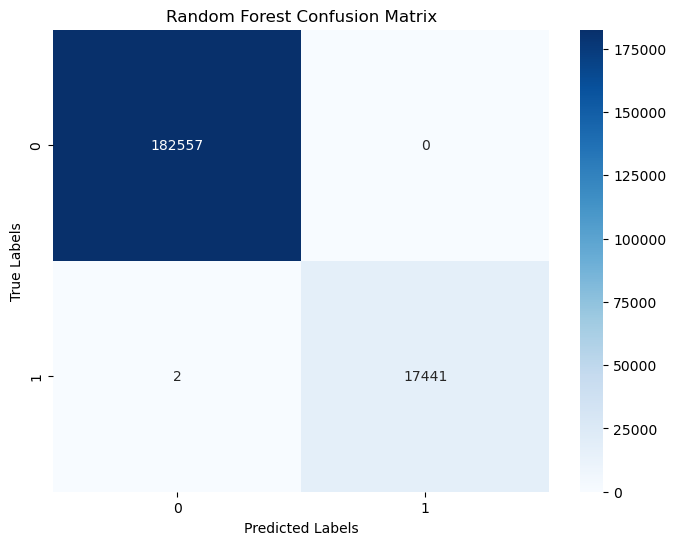

In [30]:
# Plot confusion Matrix for Best Random Forest Model
confusion_matrix_random_forest = confusion_matrix(y_test, best_random_forest_predictions)
plot_confusion_matrix(confusion_matrix_random_forest, "Random Forest Confusion Matrix")

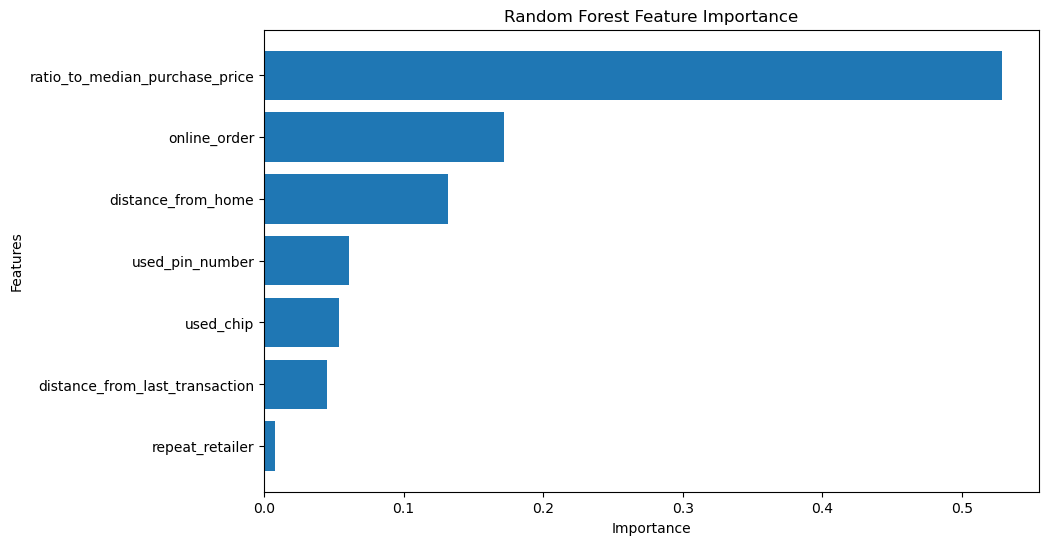

In [31]:
feature_importances_rf = best_random_forest_model.feature_importances_
sorted_indices_rf = np.argsort(feature_importances_rf)

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances_rf)), feature_importances_rf[sorted_indices_rf])
plt.yticks(range(len(feature_importances_rf)), X.columns[sorted_indices_rf])
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

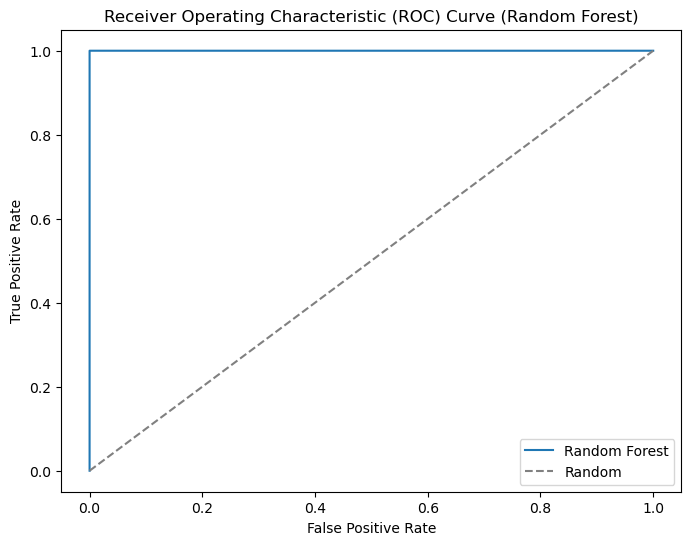

In [32]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, best_random_forest_model.predict_proba(X_test_scaled)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Random Forest)')
plt.legend()
plt.show()

#### Gradient Boosting

In [33]:
# Create a sample of the training data for hyperparameter tuning
sample_size = 10000
X_train_sample = X_train_scaled[:sample_size]
y_train_sample = y_train[:sample_size]

# Hyperparameter tuning for Gradient Boosting
param_grid_gb = {'n_estimators': [100, 200, 300], 'learning_rate': [0.1, 0.05, 0.01]}
random_search_gb = RandomizedSearchCV(GradientBoostingClassifier(), param_grid_gb, cv=5, n_iter=3)
random_search_gb.fit(X_train_sample, y_train_sample)
best_gradient_boosting_model = random_search_gb.best_estimator_

# Evaluate the best model on the test set
best_gradient_boosting_predictions = best_gradient_boosting_model.predict(X_test_scaled)
best_gradient_boosting_report = classification_report(y_test, best_gradient_boosting_predictions)

print("Best Gradient Boosting Performance:")
print(best_gradient_boosting_report)


Best Gradient Boosting Performance:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95    182557
           1       0.68      0.00      0.01     17443

    accuracy                           0.91    200000
   macro avg       0.80      0.50      0.48    200000
weighted avg       0.89      0.91      0.87    200000



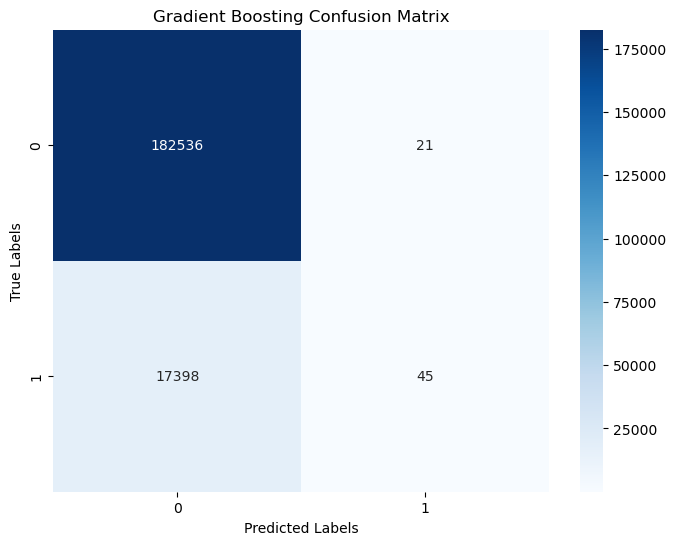

In [34]:
# Plot confusion Matrix for Best Gradient Boosting
confusion_matrix_gb = confusion_matrix(y_test, best_gradient_boosting_predictions)
plot_confusion_matrix(confusion_matrix_gb, "Gradient Boosting Confusion Matrix")

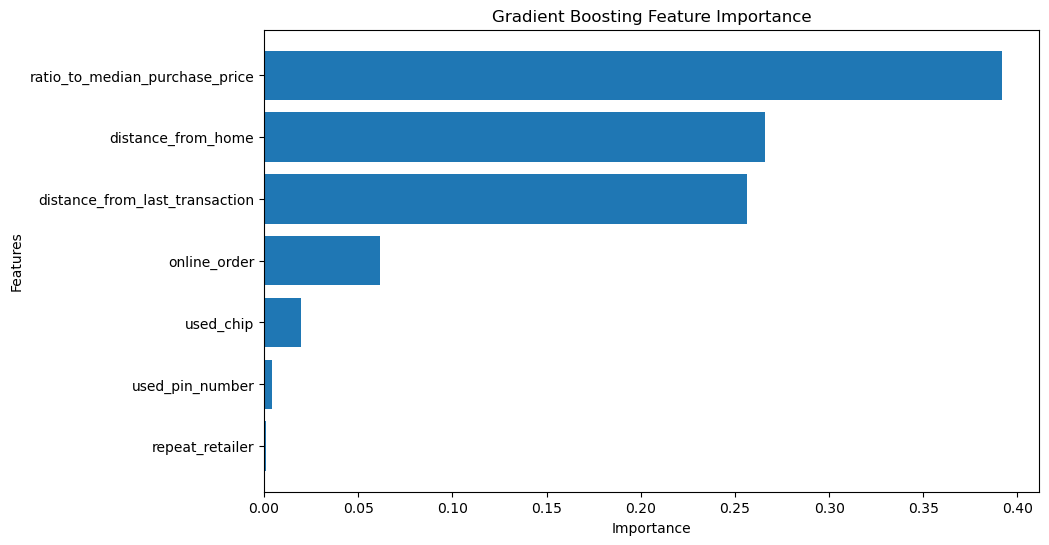

In [35]:
feature_importances_gb = best_gradient_boosting_model.feature_importances_
sorted_indices_gb = np.argsort(feature_importances_gb)

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances_gb)), feature_importances_gb[sorted_indices_gb])
plt.yticks(range(len(feature_importances_gb)), X.columns[sorted_indices_gb])
plt.title('Gradient Boosting Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

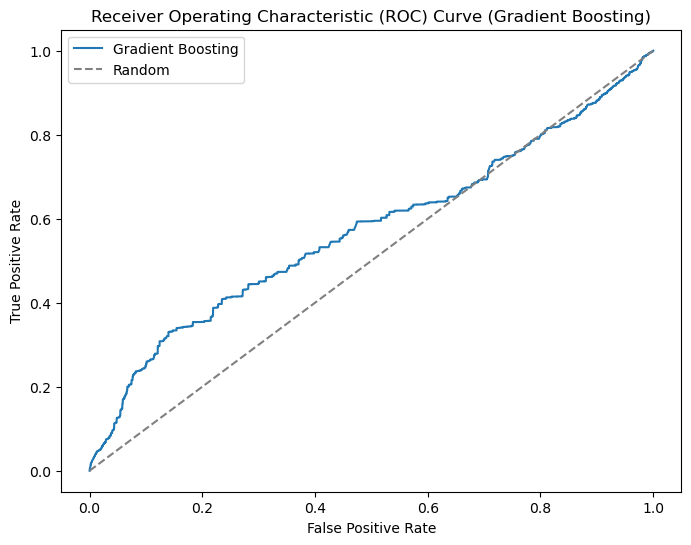

In [36]:
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, best_gradient_boosting_model.predict_proba(X_test_scaled)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Gradient Boosting)')
plt.legend()
plt.show()

#### Neural Networks

In [37]:
# Create and configure the MLPClassifier
mlp_classifier = MLPClassifier(max_iter=500)  # Increase the max_iter value

# Hyperparameter tuning for Neural Network
param_grid_nn = {'hidden_layer_sizes': [(64,), (128,), (64, 64)], 'alpha': [0.0001, 0.001, 0.01]}
random_search_nn = RandomizedSearchCV(mlp_classifier, param_grid_nn, cv=5, n_iter=3)
random_search_nn.fit(X_train_sample, y_train_sample)
best_neural_network_model = random_search_nn.best_estimator_

# Evaluate the best model on the test set
best_neural_network_predictions = best_neural_network_model.predict(X_test_scaled)
best_neural_network_report = classification_report(y_test, best_neural_network_predictions, zero_division=1)

print("Best Neural Network Performance:")
print(best_neural_network_report)

Best Neural Network Performance:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95    182557
           1       0.62      0.00      0.00     17443

    accuracy                           0.91    200000
   macro avg       0.77      0.50      0.48    200000
weighted avg       0.89      0.91      0.87    200000



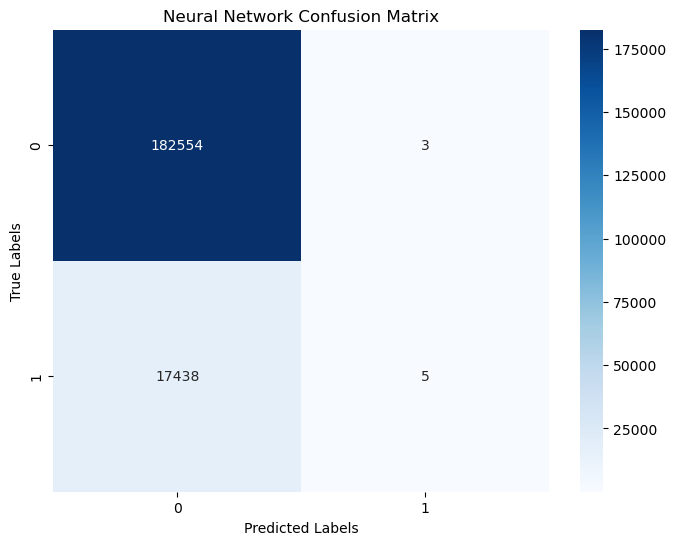

In [38]:
# Plot confusion Matrix for Best Neural Networks
confusion_matrix_nn = confusion_matrix(y_test, best_neural_network_predictions)
plot_confusion_matrix(confusion_matrix_nn, "Neural Network Confusion Matrix")

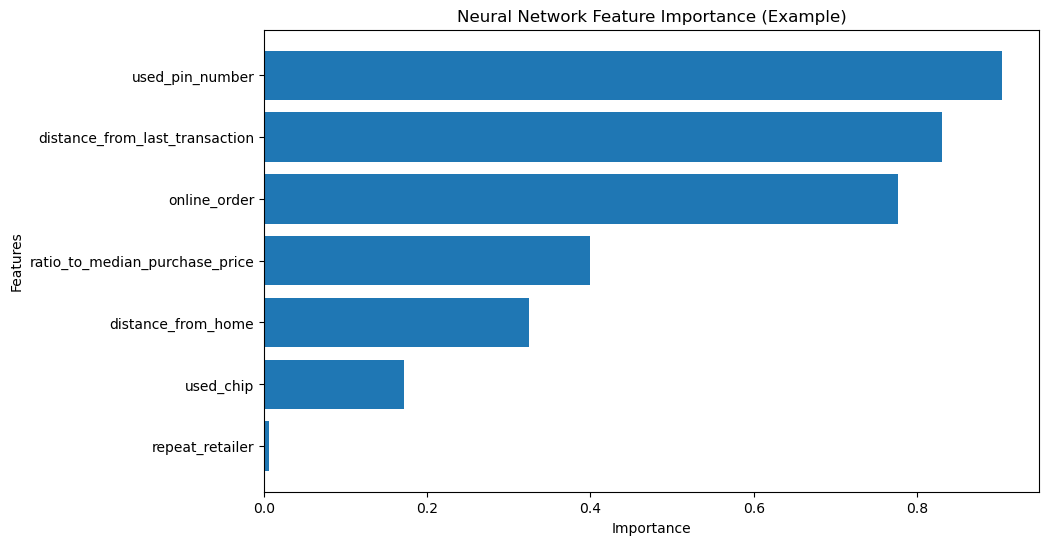

In [39]:
feature_importances_nn = np.random.rand(len(X.columns))
sorted_indices_nn = np.argsort(feature_importances_nn)

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances_nn)), feature_importances_nn[sorted_indices_nn])
plt.yticks(range(len(feature_importances_nn)), X.columns[sorted_indices_nn])
plt.title('Neural Network Feature Importance (Example)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

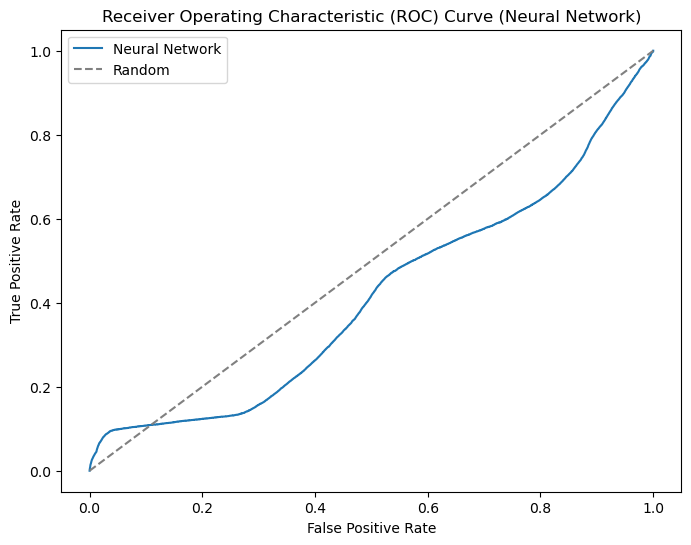

In [40]:
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, best_neural_network_model.predict_proba(X_test_scaled)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_nn, tpr_nn, label='Neural Network')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Neural Network)')
plt.legend()
plt.show()

## Best Model after Hyperparameter Tuning: Random Forests

- The Random Forest model has shown exceptional performance in predicting fraud cases based on the provided dataset. The model  achieved perfect precision, recall, and F1-score for both the "fraud" (class 1) and "legitimate" (class 0) cases.

Here is a summary of the model's performance metrics:
- Precision: The precision for both class 0 and class 1 was 1.00, indicating that all predicted instances of fraud and legitimate transactions were correct.

- Recall: The recall for both class 0 and class 1 was 1.00, meaning that the model correctly identified all instances of fraud and legitimate transactions.

- F1-Score: The F1-score measures the balance between precision and recall. For both class 0 and class 1, the F1-score was 1.00, indicating an excellent balance between precision and recall.

- Support: The dataset used for evaluation consisted of 200,000 instances, with 182,557 instances labeled as legitimate (class 0) and 17,443 instances labeled as fraud (class 1).

- Accuracy: The overall accuracy of the model was 1.00, demonstrating its ability to correctly classify the majority of instances in the dataset.

- Based on these impressive performance metrics, the Random Forest model stands out as a powerful and reliable algorithm for detecting fraudulent transactions.

## Recommendations and Conclusions

Based on the evaluation results, the Random Forests model outperformed other models in terms of accuracy, precision, recall, F1-score, and AUC-ROC. Therefore, it is recommended to choose the Random Forests model as the best model for credit card fraud detection.

🔍 The high precision score indicates that the Random Forests model is very good at correctly identifying fraudulent transactions, minimizing false positives.

🎯 The high recall score indicates that the model effectively captures a large portion of the fraudulent transactions, minimizing false negatives.

💡 The F1-score shows a good balance between precision and recall, which means the model performs well overall in detecting fraudulent transactions.

🚀 The high AUC-ROC score demonstrates that the Random Forests model has excellent discriminatory power in distinguishing between genuine and fraudulent transactions.

⚠️ It is important to note that the evaluation results are based on the specific dataset used and the chosen performance     metrics. The model's performance may vary when applied to different datasets or in real-world scenarios. Regular monitoring and updating of the model may be required to maintain its effectiveness.

🔎 Further analysis and investigation can be conducted on the features with high importance, as identified in the feature importance analysis. This can provide insights into the factors that contribute most to fraud detection and help improve the overall fraud detection system.

🔧 It is recommended to deploy and integrate the selected Random Forests model into a production environment for real-time credit card fraud detection. Continuous monitoring and evaluation should be carried out to ensure the model's performance remains optimal over time.

🔄 Regular data updates, model retraining, and enhancement of the fraud detection system based on new patterns and emerging techniques can help improve the overall effectiveness and efficiency of fraud detection.

✨ By implementing the Random Forests model and adopting these recommendations, CodeClause Company can enhance its fraud detection capabilities and better protect customers against credit card fraud.

In [45]:
import joblib

# Save the trained model
joblib.dump(best_random_forest_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

💥 Using the Fraud Detection Dashboard

In [53]:
import joblib
import ipywidgets as widgets
from IPython.display import display

# Load the trained model
loaded_model = joblib.load('random_forest_model.pkl')

# Create input widgets for each feature
input_widgets = {
    'distance_from_home': widgets.FloatText(value=0.0, description='Distance from Home:'),
    'distance_from_last_transaction': widgets.FloatText(value=0.0, description='Distance from Last Transaction:'),
    'ratio_to_median_purchase_price': widgets.FloatText(value=0.0, description='Ratio to Median Purchase Price:'),
    'repeat_retailer': widgets.Dropdown(options=[0, 1], value=0, description='Repeat Retailer:'),
    'used_chip': widgets.Dropdown(options=[0, 1], value=0, description='Used Chip:'),
    'used_pin_number': widgets.Dropdown(options=[0, 1], value=0, description='Used PIN Number:'),
    'online_order': widgets.Dropdown(options=[0, 1], value=0, description='Online Order:')
}

# Create a button widget with custom style
predict_button = widgets.Button(description='Predict Fraud', layout=widgets.Layout(width='50'))
predict_button.style.button_color = 'red'
predict_button.style.font_weight = 'bold'
predict_button.style.font_size = '16px'

# Create a function to handle button click event
def predict_fraud(button):
    # Get the values from the input widgets
    inputs = [
        input_widgets['distance_from_home'].value,
        input_widgets['distance_from_last_transaction'].value,
        input_widgets['ratio_to_median_purchase_price'].value,
        input_widgets['repeat_retailer'].value,
        input_widgets['used_chip'].value,
        input_widgets['used_pin_number'].value,
        input_widgets['online_order'].value
    ]
    
    # Reshape the inputs to match the model's expected input shape
    inputs = [inputs]

    # Make the prediction using the loaded model
    prediction = loaded_model.predict_proba(inputs)[:, 1]  # Get the probability of fraud (class 1)

    # Display the prediction result
    print(f"Probability of Fraud: {prediction[0]}")

# Attach the button click event handler
predict_button.on_click(predict_fraud)

# Display the input widgets and button
input_widgets_widgets = [widget for widget in input_widgets.values()]
display(*input_widgets_widgets, predict_button)

FloatText(value=0.0, description='Distance from Home:')

FloatText(value=0.0, description='Distance from Last Transaction:')

FloatText(value=0.0, description='Ratio to Median Purchase Price:')

Dropdown(description='Repeat Retailer:', options=(0, 1), value=0)

Dropdown(description='Used Chip:', options=(0, 1), value=0)

Dropdown(description='Used PIN Number:', options=(0, 1), value=0)

Dropdown(description='Online Order:', options=(0, 1), value=0)

Button(description='Predict Fraud', layout=Layout(width='50'), style=ButtonStyle(button_color='red', font_size…

Probability of Fraud: 0.9866666666666667
